# The Price of Hedging
1. Below we first generate 2 random return series we will use in the homwork.
2. Compute some basic stats on the return streams, including annualized returns, volatilities, sharpes and correlations.
3. Combine the two returns streams optimally. What is the Sharpe ratio of the combo?
4. Now, compute what happens to the optimal weights and sharpes as we change the average annualized return on "HEDGE" in a range between -10% and 10% in increments of 1%. Roughly what return do you need on "HEDGE" to justify a zero weight? 


In [12]:
import numpy as np 
import pandas as pd 
def gen_strat_returns():
    np.random.seed(5)
    

    corr = [[1, -0.5],
            [-0.5, 1]]
    
    corr = np.array(corr)
    
    vols = np.diag(np.array([0.1, 0.1])) / np.sqrt(252)
    
    sigma = vols @ corr @ vols
    
    mu = np.array([0.1,0.1]) / 252
    
    dates = pd.date_range('20100101','20191231',freq='B')
    
    rets = np.random.multivariate_normal(mu, sigma, size = len(dates))
    rets = pd.DataFrame(rets,columns = ['X','HEDGE'], index = dates)
    

    rets = rets/rets.std()*0.1/np.sqrt(252)
    rets = rets-rets.mean()
    rets = rets+mu
    return rets

rets = gen_strat_returns() # X is one strart, HEDGE is another

In [13]:
rets

,X,HEDGE
2010-01-01,-0.003186,0.001821
2010-01-04,-0.013704,0.012633
2010-01-05,0.004585,0.005928
2010-01-06,0.003306,-0.006154
2010-01-07,-0.001811,0.000476
...,...,...
2019-12-25,-0.002816,0.000228
2019-12-26,-0.000756,0.000144
2019-12-27,-0.003515,-0.007862
2019-12-30,0.009921,-0.005380


2. Compute some basic stats on the return streams, including annualized returns, volatilities, sharpes and correlations.

In [15]:

stats = {}
stats['Return'] = rets.mean() * 252
stats['Volatility'] = rets.std() * np.sqrt(252)
stats['Sharpe Ratio'] = stats['Return'] / stats['Volatility']
stats = pd.DataFrame(stats).T
stats

,X,HEDGE
Return,0.1,0.1
Volatility,0.1,0.1
Sharpe Ratio,1.0,1.0


In [16]:
rets.corr()

,X,HEDGE
X,1.000000,-0.513782
HEDGE,-0.513782,1.000000


3. Combine the two returns streams optimally. What is the Sharpe ratio of the combo?

In [22]:
mu = rets.mean()
sigma = rets.cov()

def optimal_weights(sigma,mu):
    wgt = np.linalg.inv(sigma) @ mu  # sigma^-1 * mu
    wgt = wgt / np.abs(wgt).sum() 
    return wgt

wgt = optimal_weights(sigma,mu)
combo = (rets*wgt).sum(axis=1)
combo.mean()/combo.std() * np.sqrt(252)  # Sharpe ratio of the combo

np.float64(2.028148067944188)

In [23]:
wgt

array([0.5, 0.5])

### Why we have to normalize the weights

In [25]:
def optimal_weights2(sgima, mu):
    wgt = np.linalg.inv(sigma) @ mu  # sigma^-1 * mu
    return wgt

wgt = optimal_weights2(sigma, mu)
wgt

array([20.56692293, 20.56692293])

4. Now, compute what happens to the optimal weights and sharpes as we change the average annualized return on "HEDGE" in a range between -10% and 10% in increments of 1%. Roughly what return do you need on "HEDGE" to justify a zero weight?

In [26]:
get_sharpe = lambda x: x.mean()/x.std()*np.sqrt(252)

wgts = {}
sharpes = {}
for hedge_ret in np.arange(-0.1,0.11,0.01):

    rets['HEDGE'] = rets['HEDGE'] - rets['HEDGE'].mean() + hedge_ret / 252
    mu = rets.mean() 
    
    wgt = pd.Series(optimal_weights(sigma,mu),mu.index)
    
    hedge_ret_str = '%.0f%%'%(hedge_ret*100)
    wgts[hedge_ret_str] = wgt 
    
    
    sharpes[hedge_ret_str] = get_sharpe((rets*wgt).sum(1))
    
wgts = pd.DataFrame(wgts).T
sharpes = pd.Series(sharpes)

In [27]:
wgts

,X,HEDGE
-10%,0.500000,-0.500000
-9%,0.581931,-0.418069
-8%,0.672966,-0.327034
-7%,0.774710,-0.225290
-6%,0.889173,-0.110827
-5%,0.981791,0.018209
-4%,0.874726,0.125274
-3%,0.798251,0.201749
-2%,0.740895,0.259105
-1%,0.696285,0.303715


<Axes: >

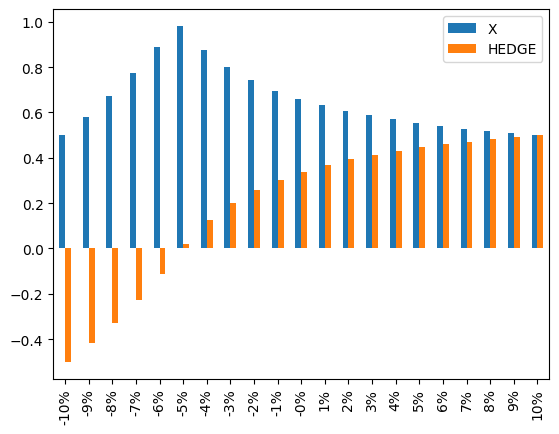

In [30]:
wgts.plot(kind = 'bar')

<Axes: >

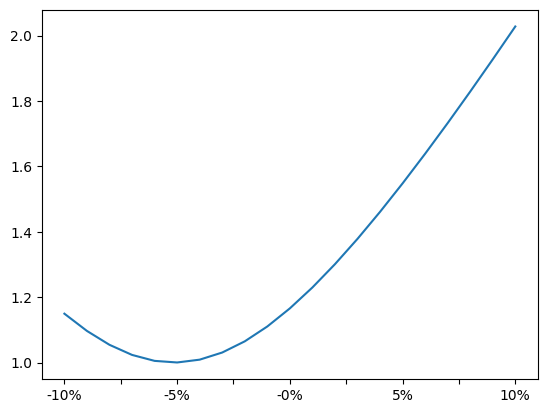

In [34]:
sharpes.plot()